In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def rf(name, SP, FORMAT, filename = 'scaling.xlsx'):
    '''plot r_f of your data
    
    ------paras
    name: str
       name of your r_f plot
    SP: str, should be 'T' or others
       If you don't want to save picture, just assign SP != 'T'.
    FORMAT: str
       format of your picture
    filename: str
       filename of your data. please read 'readme.png' to know the format of your file  
       ######support file format: csv, excel
       
    ------output
    a picture
    '''
    
    if 'xlsx' in filename.split('.'):
        df = pd.read_excel(filename)
    if 'csv' in filename.split('.'):
        df = pd.read_csv(filename)
        
    keys = df.keys() #dictionary of df
    x = [df[keys[0]][i] for i in range(len(df[keys[0]]))] #corrdinate of x
    ylim = 0
    weight = [] #number of data of f_i/f_(i+1)
    r = [] #average ratio of f_i/f_(i+1)
    error = [] #STD of f_i/f_(i+1)
    
    fig, ax = plt.subplots()
    for i in range(1, len(keys)):
        y = [df[keys[i]][j] for j in range(len(df[keys[i]]))] #f_i/f_(i+1)        
        if ylim < max(y):
            ylim = max(y)
        plt.ylim([0, ylim + 0.2])
        
        y_n = []
        for j in y:
            if j == j: #check if the value is NAN. Because NAN != NAN
                y_n.append(j) # this is y data without NAN
        STD = round(np.std(y_n), 2)
        error.append(STD)
        weight.append(len(y_n))
        r.append(round(np.mean(y_n), 2))
        
        ax.errorbar(x, y, yerr = STD) #plot errorbar
        plt.plot(x, y, 'D', label = keys[i])  
    
    if 'f1/f2' in keys: #by definition of r_f, the data should not contain f1/f2
        ind = list(keys).index('f1/f2') - 1 #the first column is always x, so the index should shift by 1
        del r[ind]
        del weight[ind]
        del error[ind]

    R = np.average(r, weights = weight)
    ERROR = np.average(error, weights = weight)
    
    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    plt.text(xmax*0.98, ymax*0.1, '$r_f=%.2f\pm %.2f$' % (R,ERROR), fontsize=30, verticalalignment='bottom', horizontalalignment='right')
    
    plt.title(name, size = 20)
    plt.xlabel('$x$', size = 15)
    plt.ylabel('$r_f(x)$', size = 15)
    plt.legend(loc = 'best', prop = {'size': 15})
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('rf of ' + name + '.' + FORMAT, dpi = 300, format = FORMAT)
    plt.show()

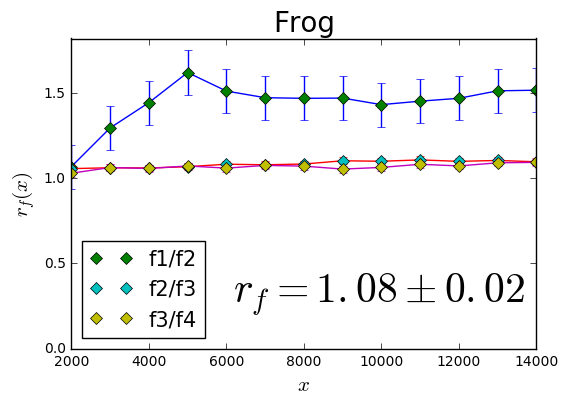

In [33]:
'''
support file format: csv, excel
'''

filename = 'scaling.xlsx' #filename of your excel file
name = 'Frog'
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'eps' #the format of your picture


rf(name, SP, FORMAT, filename)